## Подгружаем библиотеки, генерим точки

In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
from sklearn.datasets import make_blobs

In [4]:
X, y = make_blobs(n_samples = 100, random_state = 10)

In [5]:
plt.figure(figsize = (7,7))

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

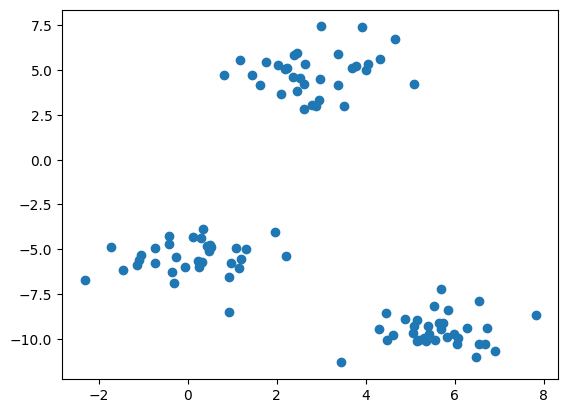

In [11]:
plt.scatter(X[0 : len(X), 0], X[ : , 1])

In [13]:
k = 3

In [23]:
print(X), print(y)

[[ -2.32496308  -6.6999964 ]
 [  0.51856831  -4.90086804]
 [  2.44301805   3.84652646]
 [  5.82662285  -9.92259335]
 [  2.03300209   5.28990817]
 [  3.37979515   4.18880872]
 [  6.04774884 -10.30504657]
 [ -0.42084194  -4.24889336]
 [  3.78067293   5.22062163]
 [  5.69248303  -7.19999368]
 [  5.15909568 -10.13427003]
 [  1.16464321   5.59667831]
 [  2.94601402   3.3575069 ]
 [  1.1882891   -5.56058781]
 [ -0.31748917  -6.86337766]
 [  4.32968132   5.64396726]
 [  4.28981065  -9.44982413]
 [  3.49996332   3.02156553]
 [  5.31414039  -9.94714146]
 [  2.61105267   4.22218469]
 [  4.88653379  -8.87680099]
 [  1.95552599  -4.05690149]
 [  2.09985134   3.6556301 ]
 [  1.31468967  -5.01055177]
 [  5.52556208  -8.18696464]
 [  0.81677922   4.75330395]
 [  2.52859794   4.5759393 ]
 [  3.69548081   5.14288792]
 [  2.37698085   5.82428626]
 [  5.69192445  -9.47641249]
 [  0.91726632  -6.52637778]
 [  1.44712872   4.75428451]
 [  2.96590542   4.5052704 ]
 [  6.68288513 -10.31693051]
 [ -0.43558928

(None, None)

In [22]:
    np.random.seed(0)
    centroid_ids = np.random.choice(X.shape[0], k, replace = False)
    centroids = X[centroid_ids]
print(centroids)

[[ 2.52859794  4.5759393 ]
 [-1.45074027 -6.18301386]
 [ 2.44301805  3.84652646]]


In [28]:
from tqdm import tqdm

In [27]:
!pip install tqdm

  Obtaining dependency information for tqdm from https://files.pythonhosted.org/packages/00/e5/f12a80907d0884e6dff9c16d0c0114d81b8cd07dc3ae54c5e962cc83037e/tqdm-4.66.1-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     -------------------- ----------------- 30.7/57.6 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 57.6/57.6 kB 751.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/78.3 kB ? eta -:--:--
   ---------------------------------------- 78.3/78.3 kB 2.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## Функция для нахождения центройд 

In [37]:
from tqdm import tqdm

def KMeans(X, k=3, num_iter=10):
    np.random.seed(0)
    centroid_ids = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[centroid_ids]

    for i in range(num_iter):
        clusters = {i: [] for i in range(k)}

        for x in X:
            distances = np.linalg.norm(centroids - x, axis=1)
            cluster_ind = distances.argmin()
            clusters[cluster_ind].append(x)    
        
        new_centroids = {}
        for cluster in clusters:
            new_centroids[cluster] = np.mean(clusters[cluster], axis=0)

        new_centroids = dict(sorted(new_centroids.items()))
        new_centroids = np.array(list(new_centroids.values()))
        centroids = new_centroids.copy()

    return centroids, clusters

In [39]:
centroids, clusters = KMeans(X)
centroids

array([[ 2.90614881,  5.43314686],
       [ 2.89504171, -7.53408753],
       [ 2.68953138,  3.53649614]])

In [40]:
clusters

{0: [array([2.03300209, 5.28990817]),
  array([3.78067293, 5.22062163]),
  array([1.16464321, 5.59667831]),
  array([4.32968132, 5.64396726]),
  array([0.81677922, 4.75330395]),
  array([2.52859794, 4.5759393 ]),
  array([3.69548081, 5.14288792]),
  array([2.37698085, 5.82428626]),
  array([1.44712872, 4.75428451]),
  array([2.96590542, 4.5052704 ]),
  array([2.45717481, 5.96515011]),
  array([4.05619693, 5.32231077]),
  array([3.90917002, 7.44140273]),
  array([2.62413419, 5.36941887]),
  array([2.98771848, 7.44372871]),
  array([5.0772903 , 4.23672091]),
  array([4.65804929, 6.7208918 ]),
  array([2.36013594, 4.62719573]),
  array([2.23393846, 5.11718182]),
  array([4.01289101, 5.00538736]),
  array([1.75005543, 5.44582908]),
  array([3.38492372, 5.8943468 ]),
  array([2.19087156, 5.06566526])],
 1: [array([-2.32496308, -6.6999964 ]),
  array([ 0.51856831, -4.90086804]),
  array([ 5.82662285, -9.92259335]),
  array([  6.04774884, -10.30504657]),
  array([-0.42084194, -4.24889336]),
 

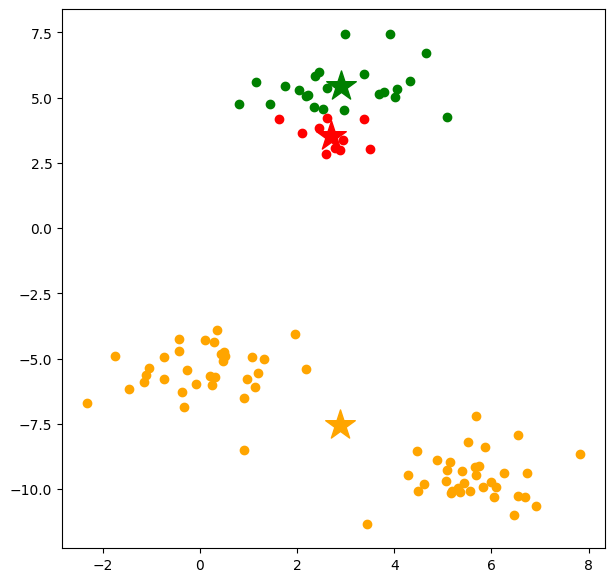

In [45]:
plt.figure(figsize = (7, 7))
colors = ['green', 'orange', 'red']
for i in clusters:
    for x in clusters[i]:
        plt.scatter( x[0], x[1], color = colors[i])

#центроиды

for i, centr in enumerate(centroids):
    plt.scatter( centr[0], centr[1], marker = '*', s=500, c= colors[i])

## Рандом не зашёл! Пробуем еще раз

In [62]:
X2, y2 = make_blobs(n_samples = 1000, random_state = 18 )

In [64]:
plt. figure( figsize =  (8,8) )

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

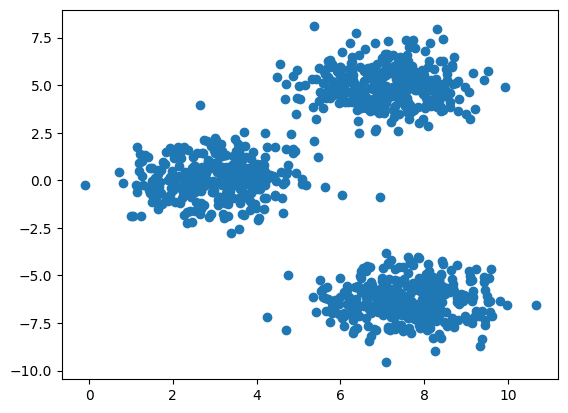

In [66]:
plt.scatter( X2[ : , 0] , X2[ : ,1])

In [67]:
centroids2, clusters2 = KMeans(X2)

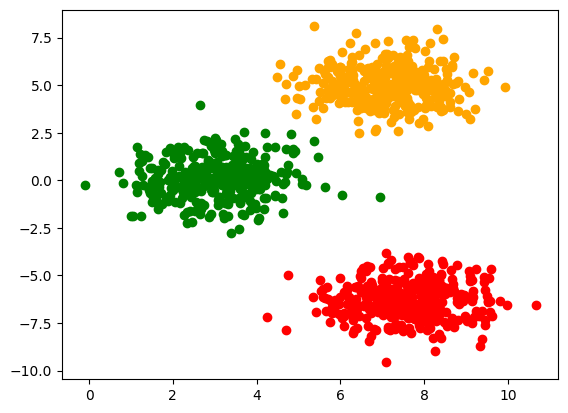

In [68]:
for i in clusters2:
    for x in clusters2[i]:
        plt.scatter( x[0], x[1], color = colors[i])

#центроиды

for i, centr in enumerate(centroids2):
    plt.scatter( centr[0], centr[1], marker = '*', s=500, c= colors[i])

## Успех! Идем дальше: K-Means в sklearn

In [47]:
from sklearn.cluster import KMeans as sk_KMeans

In [53]:
model = sk_KMeans( n_clusters = 3,
                  init = 'k-means++',
                  max_iter = 10,
                  random_state=0)

model.fit(X)

C:\Users\User1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=10, n_clusters=3, random_state=0)

In [55]:
labels = model.predict(X)
labels[:]

array([0, 0, 1, 2, 1, 1, 2, 0, 1, 2, 2, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0,
       1, 0, 2, 1, 1, 1, 1, 2, 0, 1, 1, 2, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0,
       1, 2, 2, 2, 0, 2, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 1, 1, 0, 0, 0, 2,
       2, 0, 0, 0, 1, 2, 1, 1, 0, 1, 1, 0, 2, 2, 2, 1, 2, 1, 0, 1, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 0, 1, 2, 2, 2])

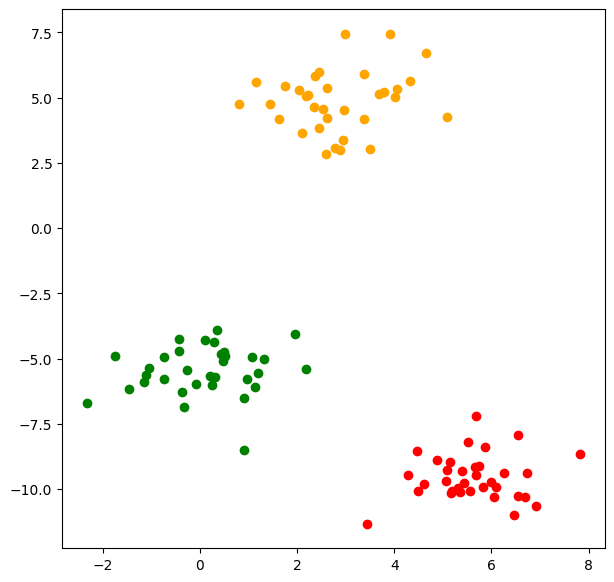

In [57]:
plt.figure(figsize = (7,7) )
for i in range(len(labels)):
    plt.scatter( X[i,0], X[i,1], color = colors[labels[i]])

In [58]:
model.cluster_centers_

array([[ 0.08921213, -5.46441742],
       [ 2.84050716,  4.85840422],
       [ 5.6183469 , -9.54288499]])

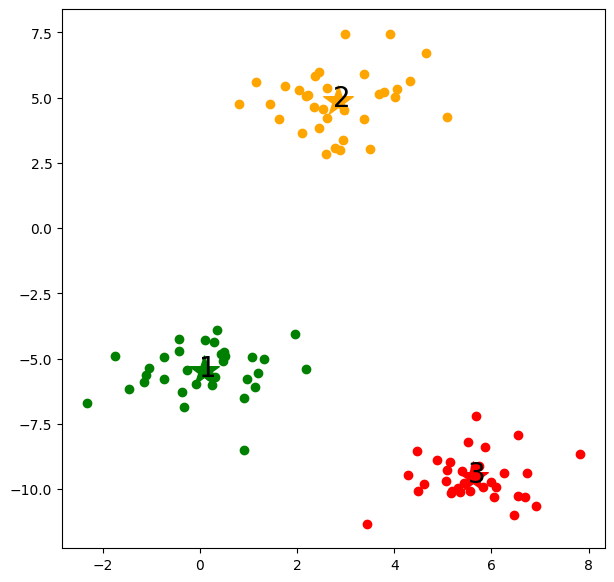

In [59]:
plt.figure( figsize = (7, 7))
for i in range(len(labels)):
    plt.scatter( X[i,0], X[i,1], color = colors[labels[i]])

for i, centr in enumerate(model.cluster_centers_):
    plt.scatter( centr[0], centr[1], marker = '*', s=500, c = colors[i])
    plt.text(centr[0] -0.1, centr[1] - 0.2, f'{i+1}', fontsize = 20);